For whole recommendation system

A hybrid collaborative filtering, that combines the advantages of both the memory-based and the model-based methods. Most commercial recommender systems are hybrid. 

We are perpared to combine user based and the model based collaborative filtering in this file. Also, we will use the most hot several products to the new user

So, firstly import the other two collaborative ways

In [1]:
!pip install ipynb

In [3]:
from ipynb.fs.full.most_hot import *
from ipynb.fs.full.user_base import *
from ipynb.fs.full.model_method import *

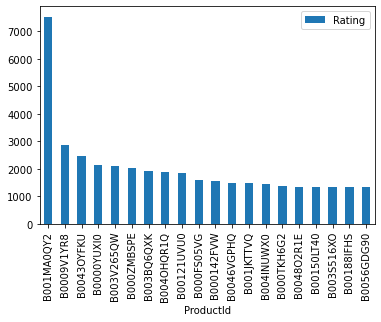

In [39]:
most_popular.head(20).plot(kind = "bar")

For the new user, we recommende most hot products to them

For others, we combine the memory-based and model-based method to recommende products

In [5]:
def recommendation(dataset, uid):
    if uid not in dataset["UserId"]:
        return most_popular.index[:10]
    recommendList, neighbors = recommendation(uid, userDic, itemDic)
    if len(recommendList) == 0: return most_popular.index[:10]

    pred_rating_result = [(iid, bcf.predict(uid,iid)) for iid in recommendList]
    pred_rating_result.sort(key = takeSecond)

    if len(pred_rating_result) < 10:
        recom_list = [product[0] for product in pred_rating_result]
        for product_id in most_popular.index[:10]:
            recom_list.append(product_id)
        return recom_list[:10]
    else:
        return pred_rating_result[:10]
    


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [20]:
bcf = BaselineCFBySGD(trainset, 50, 0.1, 0.0, ["UserId", "ProductId", "Rating"])
# Example for first user id
recommend_List = recommendation(dataset, test[0][0])
print(recommend_List)

Index(['Rating'], dtype='object')


In [14]:
print(most_popular)

            Rating
ProductId         
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
...            ...
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1

[249274 rows x 1 columns]


Calculate customer rating based on the customer_id and list of product_id (generated by the user_base model)

In [ ]:
def customer_rating_dic (customer_id, product_id_list):
    rating_dic = {} 